

---
Nama: Wildan Amru Primarifki <br>
NIM: 21.11.4030


---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords

!pip install Wordcloud
!pip install Sastrawi

from wordcloud import WordCloud, STOPWORDS

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

# **Import Dataset**

In [ ]:
path = '/content/drive/MyDrive/Kuliah/Semester 6/PDM/Dataset5000/tokopedia_50000.csv'
norm = '/content/drive/MyDrive/Kuliah/Semester 6/PDM/Dataset5000/norm.csv'

In [ ]:
data = pd.read_csv(path)

# **EDA**

In [ ]:
data.head()

,content,score
0,Selama ini sudah cukup puas dg performa aplika...,4
1,"Perbaiki lagi bisnis proses disistem kalian, s...",1
2,sebagai pengguna awal ditawarin transaksi deng...,1
3,"ribetttt bgt sistem verifikasi transaksinya,, ...",1
4,Fitur dan filter pencarian sekarang berubah. S...,1


In [ ]:
data.shape

(5000, 2)

In [ ]:
data.dtypes

content    object
score       int64
dtype: object

In [ ]:
data.isna().sum()

content    0
score      0
dtype: int64

In [ ]:
data.duplicated().sum()

1

In [ ]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [ ]:
data['score'].value_counts()

score
1    3087
5     844
2     433
3     380
4     255
Name: count, dtype: int64

# **Pre-processing**

## Labeling

In [ ]:
def labeling(score):
    if score < 3:
        return 'Negatif'
    elif score > 3:
        return 'Positif'

data['sentimen'] = data['score'].apply(labeling)
data.head()

,content,score,sentimen
0,Selama ini sudah cukup puas dg performa aplika...,4,Positif
1,"Perbaiki lagi bisnis proses disistem kalian, s...",1,Negatif
2,sebagai pengguna awal ditawarin transaksi deng...,1,Negatif
3,"ribetttt bgt sistem verifikasi transaksinya,, ...",1,Negatif
4,Fitur dan filter pencarian sekarang berubah. S...,1,Negatif


In [ ]:
data.isnull().sum()

content       0
score         0
sentimen    380
dtype: int64

In [ ]:
data = data.dropna()
data.isnull().sum()

content     0
score       0
sentimen    0
dtype: int64

In [ ]:
data['sentimen'].value_counts()

sentimen
Negatif    3520
Positif    1099
Name: count, dtype: int64

## Cleaning text & Case Folding

In [ ]:
def clean_text(text):
    text = text.lower() # konversi ke huruf kecil
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # hapus selain alfanumerik
    text = re.sub('\t\n', ' ', text) # ganti tab dan baris baru dengan spasi
    text = re.sub(r'(.)\1{2,}', r'\1', text)  # Menghapus karakter berulang lebih dari 2 kali
    text = re.sub(r'\s+', ' ', text) # ganti spasi yang lebih dari satu dengan satu spasi
    text = text.strip() # hapus spasi di awal dan akhir
    return text

data.loc[:, 'clean_text'] = data['content'].apply(clean_text)
data.head()

,content,score,sentimen,clean_text
0,Selama ini sudah cukup puas dg performa aplika...,4,Positif,selama ini sudah cukup puas dg performa aplika...
1,"Perbaiki lagi bisnis proses disistem kalian, s...",1,Negatif,perbaiki lagi bisnis proses disistem kalian sa...
2,sebagai pengguna awal ditawarin transaksi deng...,1,Negatif,sebagai pengguna awal ditawarin transaksi deng...
3,"ribetttt bgt sistem verifikasi transaksinya,, ...",1,Negatif,ribet bgt sistem verifikasi transaksinya beber...
4,Fitur dan filter pencarian sekarang berubah. S...,1,Negatif,fitur dan filter pencarian sekarang berubah su...


In [ ]:
data[['clean_text']].head()

,clean_text
0,selama ini sudah cukup puas dg performa aplika...
1,perbaiki lagi bisnis proses disistem kalian sa...
2,sebagai pengguna awal ditawarin transaksi deng...
3,ribet bgt sistem verifikasi transaksinya beber...
4,fitur dan filter pencarian sekarang berubah su...


## Tokenizing

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
def tokenize(text):
    token = word_tokenize(text)
    return token

data.loc[:, 'tokenize'] = data['clean_text'].apply(tokenize)
data.head()

,content,score,sentimen,clean_text,tokenize
0,Selama ini sudah cukup puas dg performa aplika...,4,Positif,selama ini sudah cukup puas dg performa aplika...,"[selama, ini, sudah, cukup, puas, dg, performa..."
1,"Perbaiki lagi bisnis proses disistem kalian, s...",1,Negatif,perbaiki lagi bisnis proses disistem kalian sa...,"[perbaiki, lagi, bisnis, proses, disistem, kal..."
2,sebagai pengguna awal ditawarin transaksi deng...,1,Negatif,sebagai pengguna awal ditawarin transaksi deng...,"[sebagai, pengguna, awal, ditawarin, transaksi..."
3,"ribetttt bgt sistem verifikasi transaksinya,, ...",1,Negatif,ribet bgt sistem verifikasi transaksinya beber...,"[ribet, bgt, sistem, verifikasi, transaksinya,..."
4,Fitur dan filter pencarian sekarang berubah. S...,1,Negatif,fitur dan filter pencarian sekarang berubah su...,"[fitur, dan, filter, pencarian, sekarang, beru..."


In [ ]:
data[['clean_text', 'tokenize']].head()

,clean_text,tokenize
0,selama ini sudah cukup puas dg performa aplika...,"[selama, ini, sudah, cukup, puas, dg, performa..."
1,perbaiki lagi bisnis proses disistem kalian sa...,"[perbaiki, lagi, bisnis, proses, disistem, kal..."
2,sebagai pengguna awal ditawarin transaksi deng...,"[sebagai, pengguna, awal, ditawarin, transaksi..."
3,ribet bgt sistem verifikasi transaksinya beber...,"[ribet, bgt, sistem, verifikasi, transaksinya,..."
4,fitur dan filter pencarian sekarang berubah su...,"[fitur, dan, filter, pencarian, sekarang, beru..."


## Normalisasi

In [ ]:
norm = pd.read_csv(norm, header=None)
norm_dict = pd.Series(norm[1].values, index=norm[0]).to_dict()

print(norm_dict)

{'slang': 'formal', 'woww': 'wow', 'aminn': 'amin', 'met': 'selamat', 'netaas': 'menetas', 'keberpa': 'keberapa', 'eeeehhhh': 'eh', 'kata2nyaaa': 'kata-katanya', 'hallo': 'halo', 'kaka': 'kakak', 'ka': 'kak', 'daah': 'deh', 'yaa': 'ya', 'smga': 'semoga', 'slalu': 'selalu', 'amiin': 'amin', 'kk': 'kakak', 'trus': 'terus', 'sii': 'sih', 'nyenengin': 'menyenangkan', 'bgt': 'banget', 'gemess': 'gemas', 'akuuu': 'aku', 'jgn': 'jangan', 'udah': 'sudah', 'gitu': 'begitu', 'aja': 'saja', 'gemesiin': 'menggemaskan', 'menyenangkn': 'menyenangkan', 'rb': 'ribu', 'akau': 'aku', 'saranin': 'sarankan', 'nemuin': 'menemukan', 'yah': 'ya', 'mnis2nya': 'manis-manisnya', 'gtu': 'begitu', 'tu': 'itu', 'idolaa': 'idola', 'bangett': 'banget', 'kaakk': 'kak', 'baaiikkk': 'baik', 'telaatt': 'telat', 'kaak': 'kak', 'yg': 'yang', 'lg': 'lagi', 'skarang': 'sekarang', 'loohhh': 'loh', 'yeee': 'ya', 'baguuuuus': 'bagus', 'ngikutin': 'mengikuti', 'bnk': 'bank', 'awaas': 'awas', 'siip': 'sip', 'abizzzz': 'habis', '

In [ ]:
def normalize_tokens(tokens, norm_dict):
    normalized_tokens = []
    for token in tokens:
        normalized_tokens.append(norm_dict.get(token, token))
    return normalized_tokens

In [ ]:
data.loc[:, 'normalisasi'] = data['tokenize'].apply(normalize_tokens, norm_dict=norm_dict)
data.head()

,content,score,sentimen,clean_text,tokenize,normalisasi
0,Selama ini sudah cukup puas dg performa aplika...,4,Positif,selama ini sudah cukup puas dg performa aplika...,"[selama, ini, sudah, cukup, puas, dg, performa...","[selama, ini, sudah, cukup, puas, dengan, perf..."
1,"Perbaiki lagi bisnis proses disistem kalian, s...",1,Negatif,perbaiki lagi bisnis proses disistem kalian sa...,"[perbaiki, lagi, bisnis, proses, disistem, kal...","[perbaiki, lagi, bisnis, proses, disistem, kal..."
2,sebagai pengguna awal ditawarin transaksi deng...,1,Negatif,sebagai pengguna awal ditawarin transaksi deng...,"[sebagai, pengguna, awal, ditawarin, transaksi...","[sebagai, pengguna, awal, ditawarin, transaksi..."
3,"ribetttt bgt sistem verifikasi transaksinya,, ...",1,Negatif,ribet bgt sistem verifikasi transaksinya beber...,"[ribet, bgt, sistem, verifikasi, transaksinya,...","[ribet, banget, sistem, verifikasi, transaksin..."
4,Fitur dan filter pencarian sekarang berubah. S...,1,Negatif,fitur dan filter pencarian sekarang berubah su...,"[fitur, dan, filter, pencarian, sekarang, beru...","[fitur, dan, filter, pencarian, sekarang, beru..."


In [ ]:
data[['tokenize', 'normalisasi']].head()

,tokenize,normalisasi
0,"[selama, ini, sudah, cukup, puas, dg, performa...","[selama, ini, sudah, cukup, puas, dengan, perf..."
1,"[perbaiki, lagi, bisnis, proses, disistem, kal...","[perbaiki, lagi, bisnis, proses, disistem, kal..."
2,"[sebagai, pengguna, awal, ditawarin, transaksi...","[sebagai, pengguna, awal, ditawarin, transaksi..."
3,"[ribet, bgt, sistem, verifikasi, transaksinya,...","[ribet, banget, sistem, verifikasi, transaksin..."
4,"[fitur, dan, filter, pencarian, sekarang, beru...","[fitur, dan, filter, pencarian, sekarang, beru..."


## Stopwords Removal

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
nltk.download('stopwords')

factory = StopWordRemoverFactory()
stopword_sastrawi = factory.get_stop_words()

stopword_nltk = nltk.corpus.stopwords.words('indonesian')

stopwords = set(stopword_sastrawi + stopword_nltk)
stopwords.update(["tokopedia", "aplikasi"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    clean_words = [word for word in text if word.lower() not in stopwords]
    clean_text = ' '.join(clean_words)
    return clean_text

data.loc[:, 'stopwords']= data['normalisasi'].apply(remove_stopwords)
data.head()

,content,score,sentimen,clean_text,tokenize,normalisasi,stopwords
0,Selama ini sudah cukup puas dg performa aplika...,4,Positif,selama ini sudah cukup puas dg performa aplika...,"[selama, ini, sudah, cukup, puas, dg, performa...","[selama, ini, sudah, cukup, puas, dengan, perf...",puas performa aplikasinya sisi pengiriman masu...
1,"Perbaiki lagi bisnis proses disistem kalian, s...",1,Negatif,perbaiki lagi bisnis proses disistem kalian sa...,"[perbaiki, lagi, bisnis, proses, disistem, kal...","[perbaiki, lagi, bisnis, proses, disistem, kal...",perbaiki bisnis proses disistem penjual kirim ...
2,sebagai pengguna awal ditawarin transaksi deng...,1,Negatif,sebagai pengguna awal ditawarin transaksi deng...,"[sebagai, pengguna, awal, ditawarin, transaksi...","[sebagai, pengguna, awal, ditawarin, transaksi...",pengguna ditawarin transaksi discount plus beb...
3,"ribetttt bgt sistem verifikasi transaksinya,, ...",1,Negatif,ribet bgt sistem verifikasi transaksinya beber...,"[ribet, bgt, sistem, verifikasi, transaksinya,...","[ribet, banget, sistem, verifikasi, transaksin...",ribet banget sistem verifikasi transaksinya ka...
4,Fitur dan filter pencarian sekarang berubah. S...,1,Negatif,fitur dan filter pencarian sekarang berubah su...,"[fitur, dan, filter, pencarian, sekarang, beru...","[fitur, dan, filter, pencarian, sekarang, beru...",fitur filter pencarian berubah pencarian spesi...


In [ ]:
data[['normalisasi', 'stopwords']].head()

,normalisasi,stopwords
0,"[selama, ini, sudah, cukup, puas, dengan, perf...",puas performa aplikasinya sisi pengiriman masu...
1,"[perbaiki, lagi, bisnis, proses, disistem, kal...",perbaiki bisnis proses disistem penjual kirim ...
2,"[sebagai, pengguna, awal, ditawarin, transaksi...",pengguna ditawarin transaksi discount plus beb...
3,"[ribet, banget, sistem, verifikasi, transaksin...",ribet banget sistem verifikasi transaksinya ka...
4,"[fitur, dan, filter, pencarian, sekarang, beru...",fitur filter pencarian berubah pencarian spesi...


## Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(content):
    stemmer = StemmerFactory().create_stemmer()
    content = stemmer.stem(content)
    return content

In [ ]:
data.loc[:, 'content_clean'] = data["stopwords"].apply(stemming)

In [ ]:
data[['stopwords', 'content_clean']].head()

,stopwords,content_clean
0,puas performa aplikasinya sisi pengiriman masu...,puas performa aplikasi sisi kirim masuk apps u...
1,perbaiki bisnis proses disistem penjual kirim ...,baik bisnis proses sistem jual kirim item seng...
2,pengguna ditawarin transaksi discount plus beb...,guna ditawarin transaksi discount plus bebas o...
3,ribet banget sistem verifikasi transaksinya ka...,ribet banget sistem verifikasi transaksi kali ...
4,fitur filter pencarian berubah pencarian spesi...,fitur filter cari ubah cari spesifik kunci kec...


In [ ]:
data.to_csv('/content/drive/MyDrive/Kuliah/Semester 6/PDM/Dataset5000/tokped_preprocessing.csv', index = False)

In [ ]:
data_fix = data[['content_clean', 'sentimen']]

In [ ]:
data_fix.to_csv('/content/drive/MyDrive/Kuliah/Semester 6/PDM/Dataset5000/tokped_clean.csv', index = False)

# **Import dataset baru** (hasil pre-processing)

In [ ]:
data_clean = pd.read_csv('/content/drive/MyDrive/Kuliah/Semester 6/PDM/Dataset5000/tokped_clean.csv')
data_clean.head()

,content_clean,sentimen
0,puas performa aplikasi sisi kirim masuk apps u...,Positif
1,baik bisnis proses sistem jual kirim item seng...,Negatif
2,guna ditawarin transaksi discount plus bebas o...,Negatif
3,ribet banget sistem verifikasi transaksi kali ...,Negatif
4,fitur filter cari ubah cari spesifik kunci kec...,Negatif


In [ ]:
data_clean.isnull().sum()

content_clean    1
sentimen         0
dtype: int64

In [ ]:
data_clean.dropna(subset=['content_clean'], inplace=True)

In [ ]:
data_clean.shape

(4618, 2)

In [ ]:
data_clean['sentimen'].value_counts()

sentimen
Negatif    3520
Positif    1098
Name: count, dtype: int64

# **Visualisasi teks** (Tidak masuk Jurnal)

In [ ]:
data_negatif = data_clean[data_clean['sentimen'] == 'Negatif']
data_positif = data_clean[data_clean['sentimen'] == 'Positif']

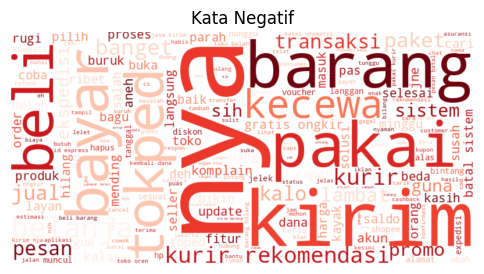

In [ ]:
text_negatif = ' '.join(str(word) for word in data_negatif["content_clean"])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="Reds").generate(text_negatif)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

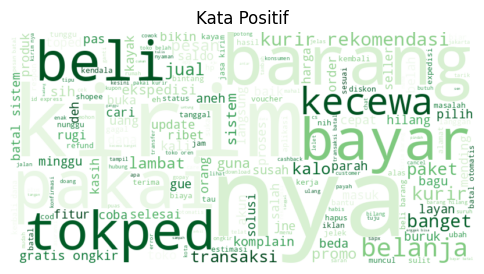

In [ ]:
text_positif = ' '.join(str(word) for word in data_positif["content_clean"])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="Greens").generate(text_negatif)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Kata Positif")
plt.margins(x=0, y=0)
plt.show()

# **Split Data**

In [ ]:
X = data_clean['content_clean']
y = data_clean['sentimen']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3694,)
(3694,)
(924,)
(924,)


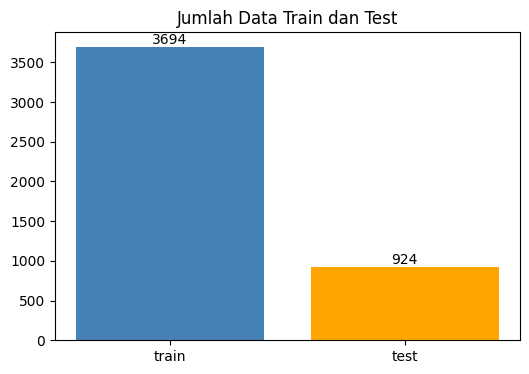

In [ ]:
labels = ['train', 'test']
counts = [X_train.shape[0], X_test.shape[0]]

plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=['steelblue', 'orange'])
plt.title('Jumlah Data Train dan Test')

for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

# **TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vec = tfidf_vectorizer.fit_transform(X_train)
X_test_vec = tfidf_vectorizer.transform(X_test)

In [ ]:
sample_vector = X_train_vec[0]
df_vec = pd.DataFrame(sample_vector.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["TF-IDF"])

In [ ]:
df_vec.sort_values(by=["TF-IDF"], ascending=False).head(11)

,TF-IDF
jelek,0.461866
sagat,0.434169
kalimantan,0.378196
selatan,0.378196
reguler,0.299711
expedisi,0.239659
minggu,0.208120
toped,0.208120
pilih,0.180784
rekomendasi,0.162103


# **SMOTE**

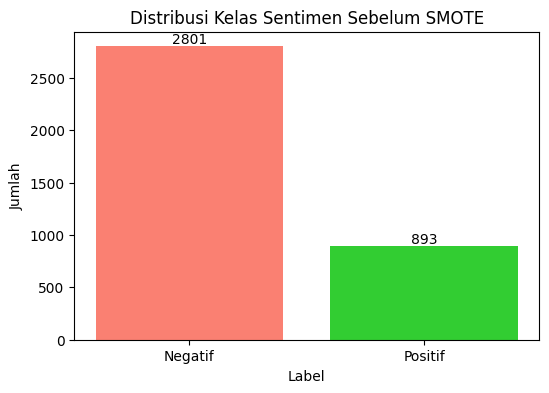

In [ ]:
labels = ['Negatif', 'Positif']
counts = y_train.value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=['salmon', 'limegreen'])
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.title('Distribusi Kelas Sentimen Sebelum SMOTE')

for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

In [ ]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

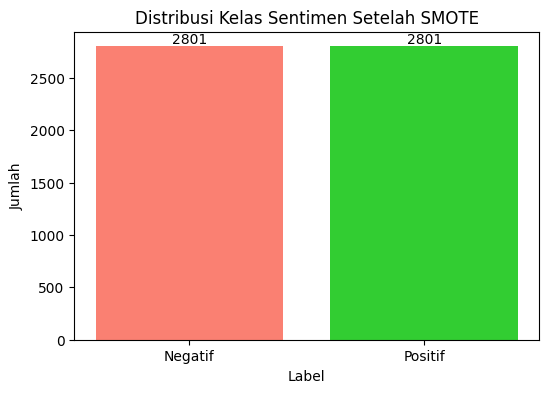

In [ ]:
labels = ['Negatif', 'Positif']
counts = pd.Series(y_train_resampled).value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=['salmon', 'limegreen'])
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.title('Distribusi Kelas Sentimen Setelah SMOTE')

for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

# **Modeling dan Komparasi kernel**


## RBF

In [ ]:
from sklearn.svm import SVC

In [ ]:
rbf = SVC(random_state=42, kernel='rbf', C= 10, gamma= 'scale', max_iter= -1)
rbf.fit(X_train_resampled, y_train_resampled)

SVC(C=10, random_state=42)

In [ ]:
y_pred_rbf = rbf.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred_rbf)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_rbf, average='macro')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1_score * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf))

Accuracy: 89.29%
Precision: 89.65%
Recall: 78.12%
F1 score: 82.04%

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.89      0.98      0.93       719
     Positif       0.90      0.58      0.71       205

    accuracy                           0.89       924
   macro avg       0.90      0.78      0.82       924
weighted avg       0.89      0.89      0.88       924



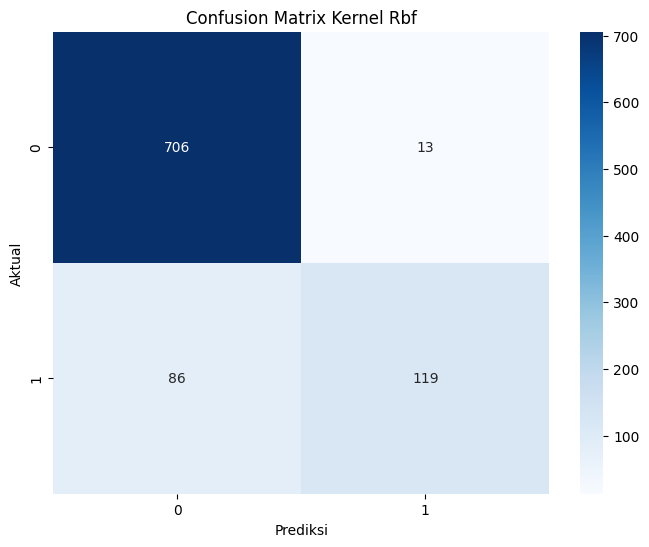

In [ ]:
from sklearn.metrics import confusion_matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Kernel Rbf')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

## Linear

In [ ]:
linear = SVC(random_state=42, kernel='linear', C= 10, gamma= 'scale', max_iter= -1)
linear.fit(X_train_resampled, y_train_resampled)

SVC(C=10, kernel='linear', random_state=42)

In [ ]:
y_pred_linear = linear.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred_linear)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_linear, average='macro')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1_score * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear))

Accuracy: 84.20%
Precision: 77.15%
Recall: 76.77%
F1 score: 76.96%

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.90      0.90      0.90       719
     Positif       0.65      0.63      0.64       205

    accuracy                           0.84       924
   macro avg       0.77      0.77      0.77       924
weighted avg       0.84      0.84      0.84       924



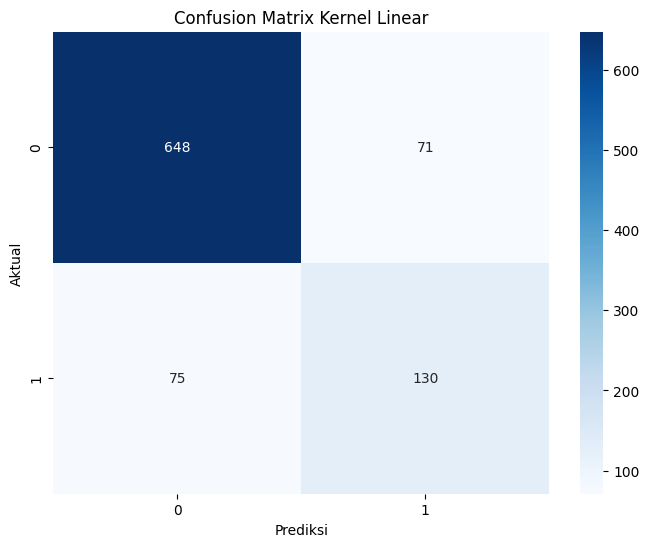

In [ ]:
from sklearn.metrics import confusion_matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Kernel Linear')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

## Sigmoid

In [ ]:
sigmoid = SVC(random_state=42, kernel='sigmoid', C= 10, gamma= 'scale', max_iter= -1)
sigmoid.fit(X_train_resampled, y_train_resampled)

SVC(C=10, kernel='sigmoid', random_state=42)

In [ ]:
y_pred_sigmoid = sigmoid.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred_sigmoid)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_sigmoid, average='macro')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1_score * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sigmoid))

Accuracy: 82.03%
Precision: 74.66%
Recall: 79.22%
F1 score: 76.32%

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.92      0.84      0.88       719
     Positif       0.57      0.74      0.65       205

    accuracy                           0.82       924
   macro avg       0.75      0.79      0.76       924
weighted avg       0.84      0.82      0.83       924



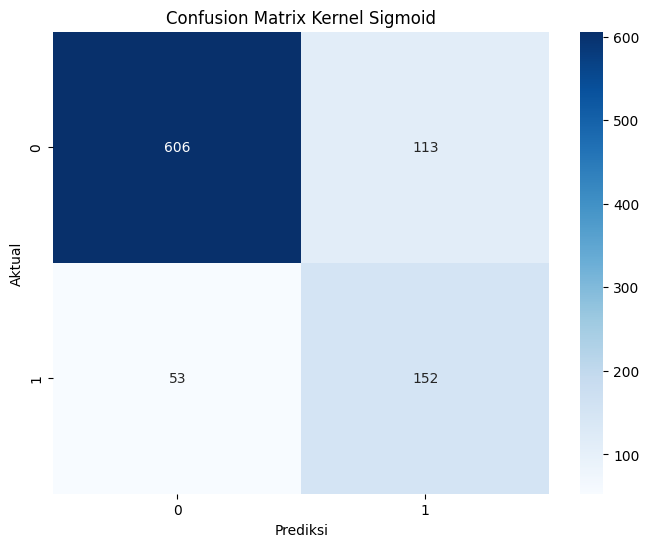

In [ ]:
from sklearn.metrics import confusion_matrix
cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_sigmoid, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Kernel Sigmoid')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

## Poly

In [ ]:
poly = SVC(random_state=42, kernel='poly', C= 10, gamma= 'scale', max_iter= -1)
poly.fit(X_train_resampled, y_train_resampled)

SVC(C=10, kernel='poly', random_state=42)

In [ ]:
y_pred_poly = poly.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred_poly)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_poly, average='macro')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1_score * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_poly))

Accuracy: 88.31%
Precision: 88.79%
Recall: 75.93%
F1 score: 79.98%

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.88      0.98      0.93       719
     Positif       0.89      0.54      0.67       205

    accuracy                           0.88       924
   macro avg       0.89      0.76      0.80       924
weighted avg       0.88      0.88      0.87       924



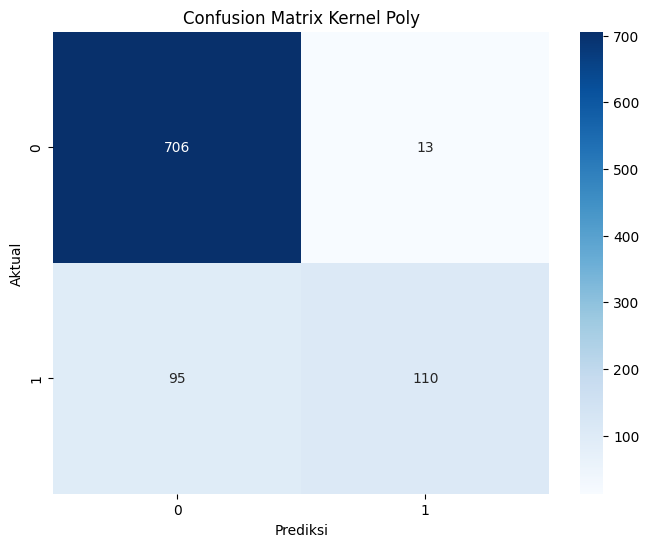

In [ ]:
from sklearn.metrics import confusion_matrix
cm_poly = confusion_matrix(y_test, y_pred_poly)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_poly, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Kernel Poly')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

## Komparasi

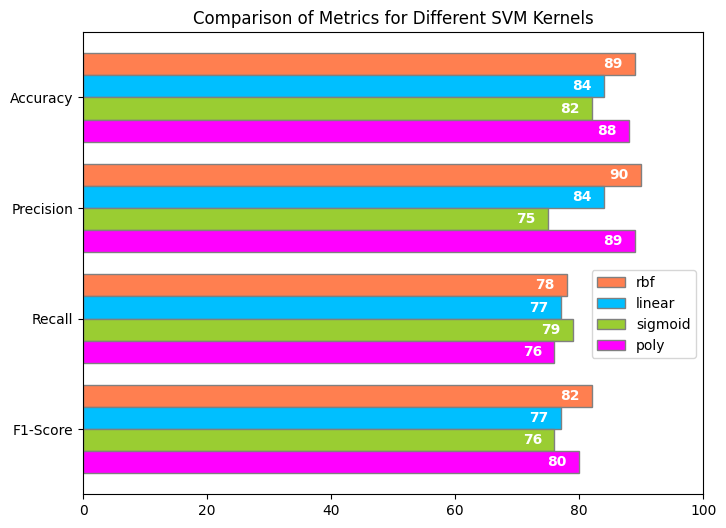

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Nama metrik yang diuji
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Data metrik untuk masing-masing kernel dalam urutan yang baru
# Format: [rbf, linear, sigmoid, poly]
accuracy = [89, 84, 82, 88]
precision = [90, 84, 75, 89]
recall = [78, 77, 79, 76]
f1_score = [82, 77, 76, 80]


barHeight = 0.2

# Set position of bar on Y axis
r1 = np.arange(len(metrics))
r2 = [x + barHeight for x in r1]
r3 = [x + barHeight for x in r2]
r4 = [x + barHeight for x in r3]

# Make the plot
plt.figure(figsize=(8, 6))
rbf = plt.barh(r1, [accuracy[0], precision[0], recall[0], f1_score[0]], color='coral', height=barHeight, edgecolor='grey', label='rbf')
linear = plt.barh(r2, [accuracy[1], precision[1], recall[1], f1_score[1]], color='deepskyblue', height=barHeight, edgecolor='grey', label='linear')
sigmoid = plt.barh(r3, [accuracy[2], precision[2], recall[2], f1_score[2]], color='yellowgreen', height=barHeight, edgecolor='grey', label='sigmoid')
poly = plt.barh(r4, [accuracy[3], precision[3], recall[3], f1_score[3]], color='magenta', height=barHeight, edgecolor='grey', label='poly')

# Add yticks on the middle of the group bars
plt.yticks([r + barHeight * 1.5 for r in range(len(metrics))], metrics)

# Add values
def add_values_to_bars(bars):
    for bar in bars:
        width = bar.get_width()
        plt.text(width - 2, bar.get_y() + bar.get_height() / 2, f'{width}',
                 va='center', ha='right', color='white', fontsize=10, fontweight='bold')

add_values_to_bars(rbf)
add_values_to_bars(linear)
add_values_to_bars(sigmoid)
add_values_to_bars(poly)

# Create legend & Show graphic
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))  # Center the legend
plt.title('Comparison of Metrics for Different SVM Kernels')
plt.xlim(0, 100) # Adjust this if your scores range is different
plt.gca().invert_yaxis()  # Invert y-axis to match the order of metrics
plt.show()

# **Save Model and TF-IDF**

In [ ]:
import pickle

# Simpan objek TF-IDF ke dalam file pickle
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

In [ ]:
best_model = SVC(random_state=42, kernel='rbf', C= 10, gamma= 'scale', max_iter= -1)
best_model.fit(X_train_resampled, y_train_resampled)

SVC(C=10, random_state=42)

In [ ]:
# Simpan model terbaik ke dalam file pickle
with open('svm_best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# **Prediksi**

In [ ]:
def sentimen_label(prediction):
    if prediction == 'Negatif':
        return 'Negatif'
    elif prediction == 'Positif':
        return 'Positif'

In [ ]:
prediksi_teks = "Banyak diskon dan promo gratis ongkir"

text_vectorized = tfidf_vectorizer.transform([prediksi_teks])
predicted_sentiment = best_model.predict(text_vectorized)

predicted_sentiment_label = sentimen_label(predicted_sentiment)
print("Teks:", prediksi_teks)
print("Sentimen yang diprediksi:", predicted_sentiment_label)

Teks: Banyak diskon dan promo gratis ongkir
Sentimen yang diprediksi: Positif


In [ ]:
prediksi_teks = "Kurir rekomendasi lama pengirimannya"

text_vectorized = tfidf_vectorizer.transform([prediksi_teks])
predicted_sentiment = best_model.predict(text_vectorized)

predicted_sentiment_label = sentimen_label(predicted_sentiment)
print("Teks:", prediksi_teks)
print("Sentimen yang diprediksi:", predicted_sentiment_label)

Teks: Kurir rekomendasi lama pengirimannya
Sentimen yang diprediksi: Negatif
